# Our Own Library Implementation of Algorithm of ML

## 1. K NEAREST NEIGHBOUR

In [14]:
## KNN with iris dataset
from sklearn.datasets import load_iris
X,y = load_iris().data, load_iris().target

In [15]:
load_iris().feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
X.shape,y.shape

((150, 4), (150,))

In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
import matplotlib.pyplot as plt

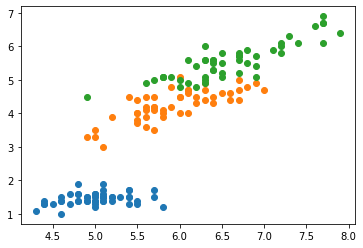

In [19]:
setosa = X[ y==0 ]
versicolor = X[ y==1 ]
verginica = X[y==2 ]

plt.scatter(setosa[:,0],setosa[:,2])
plt.scatter(versicolor[:,0],versicolor[:,2])
plt.scatter(verginica[:,0],verginica[:,2])

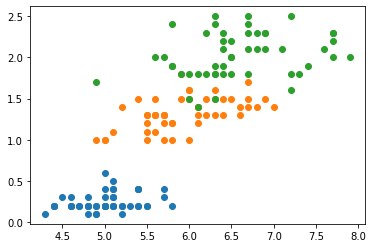

In [20]:
plt.scatter(setosa[:,0],setosa[:,3])
plt.scatter(versicolor[:,0],versicolor[:,3])
plt.scatter(verginica[:,0],verginica[:,3])

### Train test split of data

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = .33)

In [22]:
for i in (X_train, X_test, y_train, y_test):
    print(i.shape)

(100, 4)
(50, 4)
(100,)
(50,)


### Import knn

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier( n_neighbors = 5)

### Fitting or training our model with training datasets

In [24]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [25]:
knn_model.predict(X_test[10:30])

array([0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2])

In [26]:
y_test[10:30]

array([0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2])

In [27]:
predicted = knn_model.predict(X_test)
actual = y_test

count = 0
for i, j in zip(predicted, actual):
    
    if i!=j:
        count = count+1
print("percentage error is:",(count/len(actual)*100))

percentage error is: 2.0


In [28]:
knn_model.score(X_test, y_test)

0.98

In [29]:
knn_model.score(X_train,y_train)

0.97

## 2. K-MEANS CLUSTERING

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [31]:
def plot_cluster(cluster):

    for one_cluster in cluster:
        x = one_cluster
        y = [ 0  for i in one_cluster ]
        y[0] = 1

        plt.scatter(x, y)

    plt.show()


In [32]:
def random_centroid(k):

    cluster = [ [] for i in range(k) ]

    for i in range(k):

        cluster[i].append( randint( min(data) , max(data) ) )

    print("First random centroids : ", cluster)
    return cluster


### To calculate distance

In [33]:
def distance(centroid, point):

    return abs(centroid - point)


### To calculate lowest distance for finding cluster


In [34]:
def find_index_of_min(li):

    lowest_index = 0
    lowest_value = li[0]

    for i in range(len(li)):

        if li[i] < lowest_value:
            lowest_value = li[i]
            lowest_index = i

    return lowest_index


### For updating cluster

In [35]:
def new_cluster(data, cluster):

    cluster = [ [ cluster[0][0] ], [ cluster[1][0] ], [ cluster[2][0] ] ]

    for point in data:

        distance_from_centroid = []
        for one_cluster in cluster:

            centroid = one_cluster[0]
            

            distance_from_centroid.append( distance(centroid, point) )
        #appending point to that cluster for which lowest distance was found
        point_in_cluster = find_index_of_min(distance_from_centroid)
        cluster[ point_in_cluster ].append( point )

    print("Whole cluster : ", cluster)
    plot_cluster(cluster)
    return cluster


In [36]:
def new_centroid(cluster):

    for i in range(1 , len( cluster ) ):

        total = 0
        for j in cluster[i]:
            total = total + j

        mean = total / len( cluster[i] )
        cluster[i][0] = mean

    print(cluster)
    plot_cluster(cluster)
    return cluster


First random centroids :  [[6], [28], [32]]
Whole cluster :  [[6, 5, 14, 8, 6, 2, 14, 12, 17, 3, 17, 13, 8, 15], [28, 29, 19, 28], [32, 32, 40]]


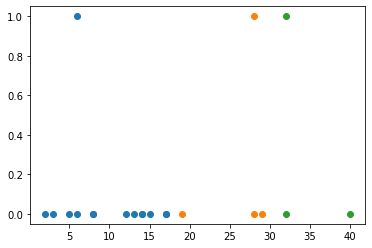

[[6, 5, 14, 8, 6, 2, 14, 12, 17, 3, 17, 13, 8, 15], [26.0, 29, 19, 28], [34.666666666666664, 32, 40]]


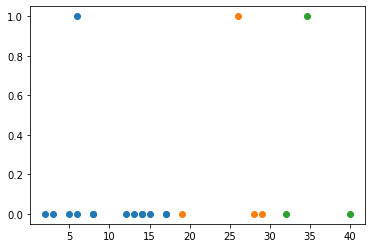

Whole cluster :  [[6, 5, 14, 8, 6, 2, 14, 12, 3, 13, 8, 15], [26.0, 29, 17, 19, 17, 28], [34.666666666666664, 32, 40]]


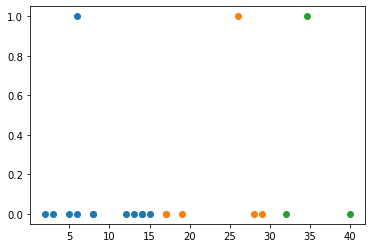

[[6, 5, 14, 8, 6, 2, 14, 12, 3, 13, 8, 15], [22.666666666666668, 29, 17, 19, 17, 28], [35.55555555555555, 32, 40]]


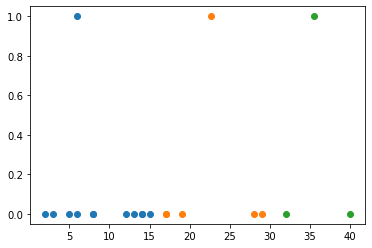

Whole cluster :  [[6, 5, 14, 8, 6, 2, 14, 12, 3, 13, 8], [22.666666666666668, 29, 17, 19, 17, 15, 28], [35.55555555555555, 32, 40]]


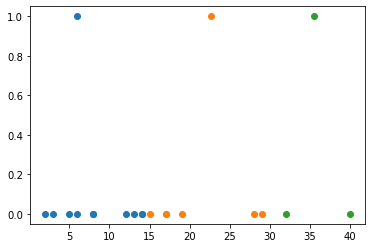

[[6, 5, 14, 8, 6, 2, 14, 12, 3, 13, 8], [21.0952380952381, 29, 17, 19, 17, 15, 28], [35.85185185185185, 32, 40]]


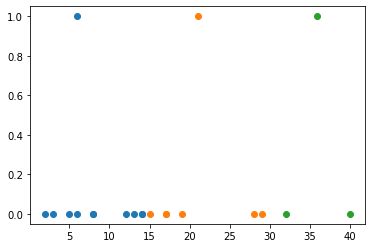

Whole cluster :  [[6, 5, 8, 6, 2, 12, 3, 13, 8], [21.0952380952381, 14, 14, 17, 19, 17, 15, 28], [35.85185185185185, 29, 32, 40]]


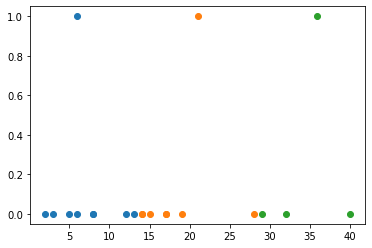

[[6, 5, 8, 6, 2, 12, 3, 13, 8], [18.136904761904763, 14, 14, 17, 19, 17, 15, 28], [34.21296296296296, 29, 32, 40]]


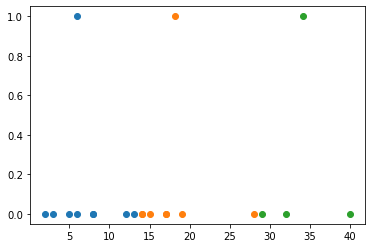

Whole cluster :  [[6, 5, 8, 6, 2, 12, 3, 8], [18.136904761904763, 14, 14, 17, 19, 17, 13, 15], [34.21296296296296, 29, 32, 40, 28]]


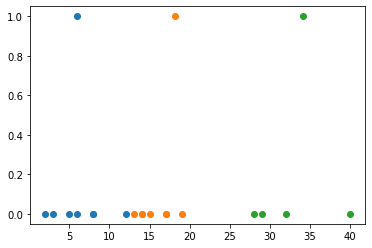

[[6, 5, 8, 6, 2, 12, 3, 8], [15.892113095238095, 14, 14, 17, 19, 17, 13, 15], [32.64259259259259, 29, 32, 40, 28]]


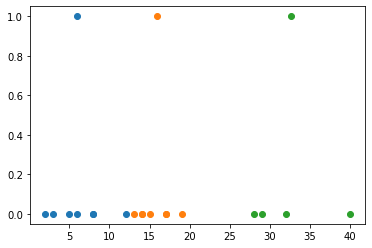

Whole cluster :  [[6, 5, 8, 6, 2, 3, 8], [15.892113095238095, 14, 14, 12, 17, 19, 17, 13, 15], [32.64259259259259, 29, 32, 40, 28]]


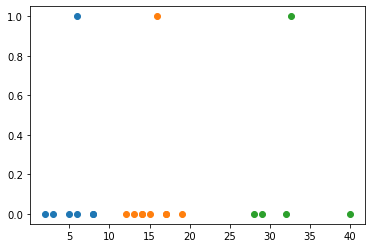

[[6, 5, 8, 6, 2, 3, 8], [15.21023478835979, 14, 14, 12, 17, 19, 17, 13, 15], [32.32851851851852, 29, 32, 40, 28]]


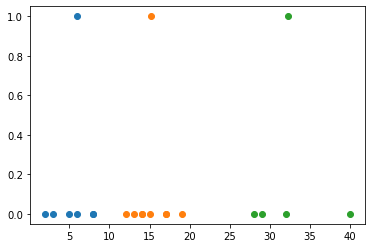

Whole cluster :  [[6, 5, 8, 6, 2, 3, 8], [15.21023478835979, 14, 14, 12, 17, 19, 17, 13, 15], [32.32851851851852, 29, 32, 40, 28]]


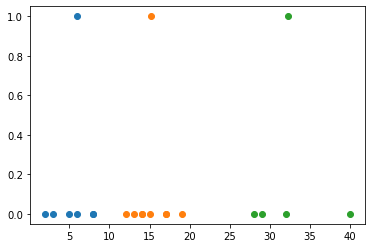

[[6, 5, 8, 6, 2, 3, 8], [15.134470532039977, 14, 14, 12, 17, 19, 17, 13, 15], [32.26570370370371, 29, 32, 40, 28]]


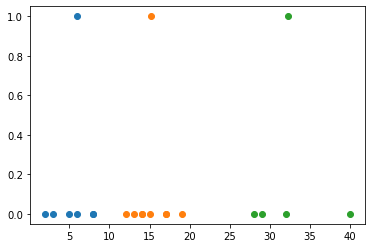

Whole cluster :  [[6, 5, 8, 6, 2, 3, 8], [15.134470532039977, 14, 14, 12, 17, 19, 17, 13, 15], [32.26570370370371, 29, 32, 40, 28]]


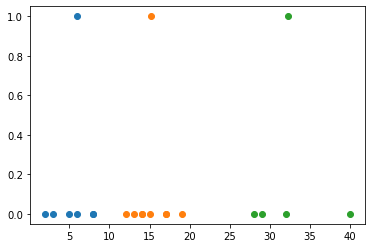

[[6, 5, 8, 6, 2, 3, 8], [15.126052281337776, 14, 14, 12, 17, 19, 17, 13, 15], [32.25314074074074, 29, 32, 40, 28]]


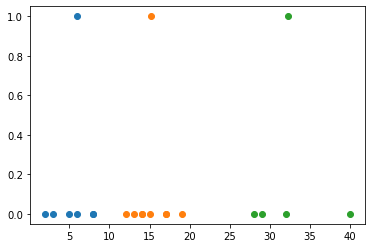

Whole cluster :  [[6, 5, 8, 6, 2, 3, 8], [15.126052281337776, 14, 14, 12, 17, 19, 17, 13, 15], [32.25314074074074, 29, 32, 40, 28]]


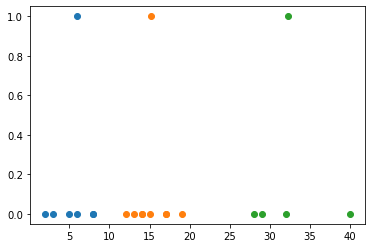

[[6, 5, 8, 6, 2, 3, 8], [15.12511692014864, 14, 14, 12, 17, 19, 17, 13, 15], [32.25062814814815, 29, 32, 40, 28]]


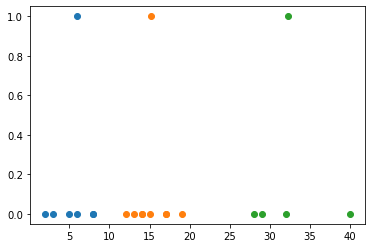

Whole cluster :  [[6, 5, 8, 6, 2, 3, 8], [15.12511692014864, 14, 14, 12, 17, 19, 17, 13, 15], [32.25062814814815, 29, 32, 40, 28]]


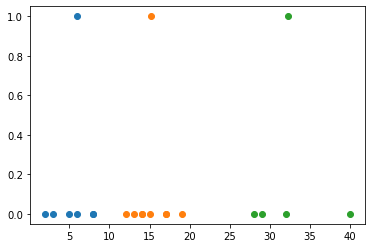

[[6, 5, 8, 6, 2, 3, 8], [15.125012991127626, 14, 14, 12, 17, 19, 17, 13, 15], [32.250125629629636, 29, 32, 40, 28]]


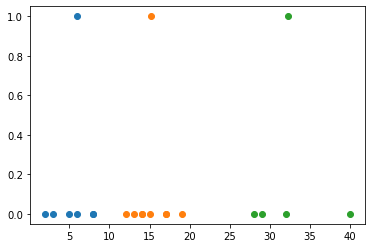

Whole cluster :  [[6, 5, 8, 6, 2, 3, 8], [15.125012991127626, 14, 14, 12, 17, 19, 17, 13, 15], [32.250125629629636, 29, 32, 40, 28]]


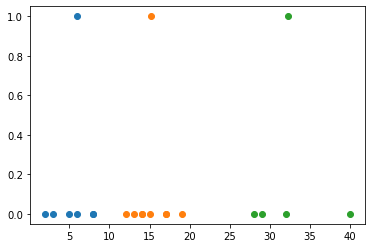

[[6, 5, 8, 6, 2, 3, 8], [15.125001443458624, 14, 14, 12, 17, 19, 17, 13, 15], [32.25002512592592, 29, 32, 40, 28]]


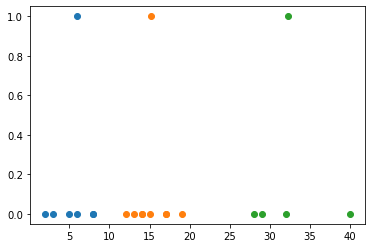

Whole cluster :  [[6, 5, 8, 6, 2, 3, 8], [15.125001443458624, 14, 14, 12, 17, 19, 17, 13, 15], [32.25002512592592, 29, 32, 40, 28]]


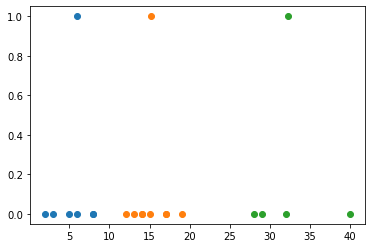

[[6, 5, 8, 6, 2, 3, 8], [15.12500016038429, 14, 14, 12, 17, 19, 17, 13, 15], [32.25000502518519, 29, 32, 40, 28]]


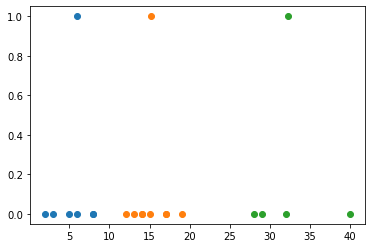

Whole cluster :  [[6, 5, 8, 6, 2, 3, 8], [15.12500016038429, 14, 14, 12, 17, 19, 17, 13, 15], [32.25000502518519, 29, 32, 40, 28]]


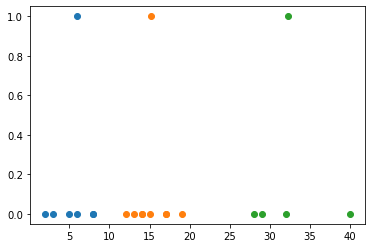

[[6, 5, 8, 6, 2, 3, 8], [15.125000017820476, 14, 14, 12, 17, 19, 17, 13, 15], [32.25000100503704, 29, 32, 40, 28]]


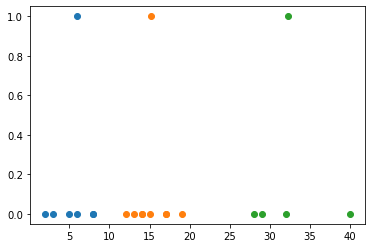

Whole cluster :  [[6, 5, 8, 6, 2, 3, 8], [15.125000017820476, 14, 14, 12, 17, 19, 17, 13, 15], [32.25000100503704, 29, 32, 40, 28]]


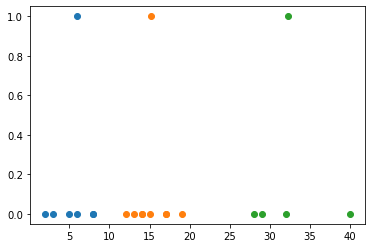

[[6, 5, 8, 6, 2, 3, 8], [15.125000001980052, 14, 14, 12, 17, 19, 17, 13, 15], [32.25000020100741, 29, 32, 40, 28]]


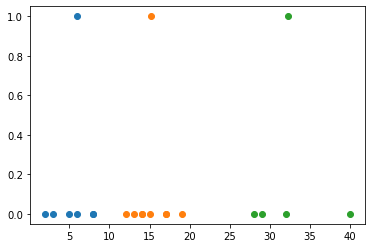

Whole cluster :  [[6, 5, 8, 6, 2, 3, 8], [15.125000001980052, 14, 14, 12, 17, 19, 17, 13, 15], [32.25000020100741, 29, 32, 40, 28]]


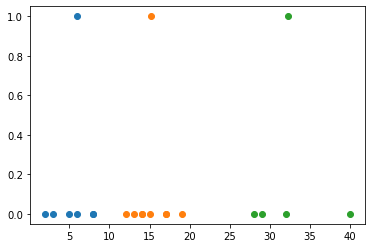

[[6, 5, 8, 6, 2, 3, 8], [15.125000000220005, 14, 14, 12, 17, 19, 17, 13, 15], [32.250000040201485, 29, 32, 40, 28]]


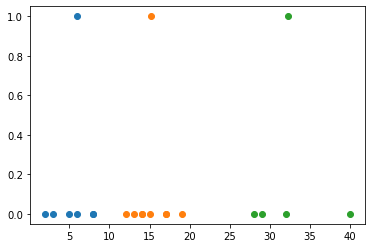

Whole cluster :  [[6, 5, 8, 6, 2, 3, 8], [15.125000000220005, 14, 14, 12, 17, 19, 17, 13, 15], [32.250000040201485, 29, 32, 40, 28]]


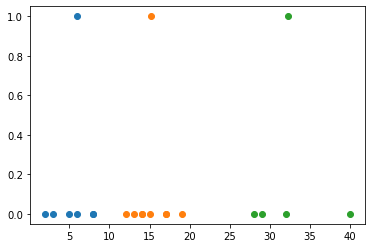

[[6, 5, 8, 6, 2, 3, 8], [15.125000000024446, 14, 14, 12, 17, 19, 17, 13, 15], [32.250000008040296, 29, 32, 40, 28]]


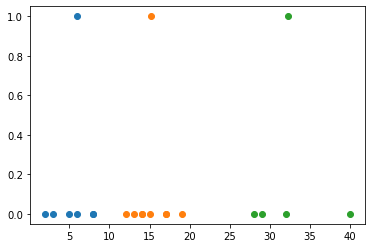

Whole cluster :  [[6, 5, 8, 6, 2, 3, 8], [15.125000000024446, 14, 14, 12, 17, 19, 17, 13, 15], [32.250000008040296, 29, 32, 40, 28]]


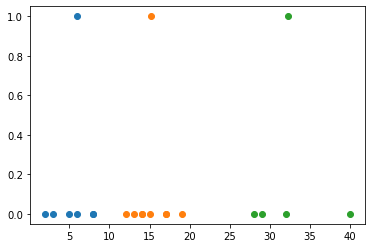

[[6, 5, 8, 6, 2, 3, 8], [15.125000000002716, 14, 14, 12, 17, 19, 17, 13, 15], [32.25000000160806, 29, 32, 40, 28]]


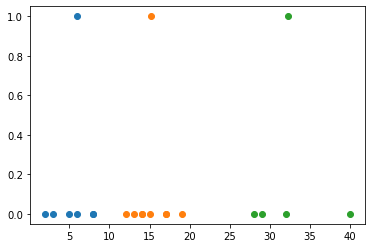

Whole cluster :  [[6, 5, 8, 6, 2, 3, 8], [15.125000000002716, 14, 14, 12, 17, 19, 17, 13, 15], [32.25000000160806, 29, 32, 40, 28]]


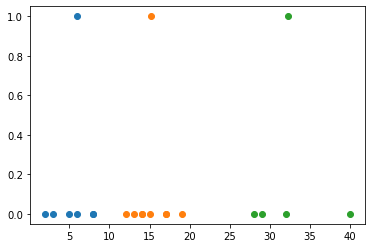

[[6, 5, 8, 6, 2, 3, 8], [15.125000000000304, 14, 14, 12, 17, 19, 17, 13, 15], [32.250000000321606, 29, 32, 40, 28]]


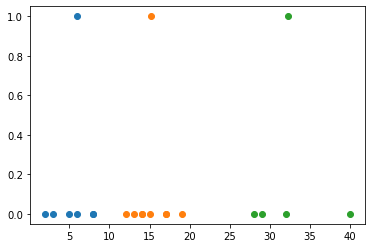

Whole cluster :  [[6, 5, 8, 6, 2, 3, 8], [15.125000000000304, 14, 14, 12, 17, 19, 17, 13, 15], [32.250000000321606, 29, 32, 40, 28]]


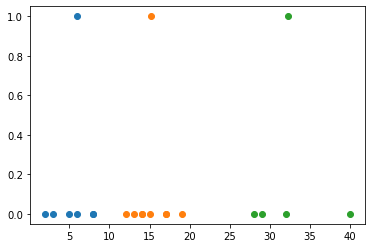

[[6, 5, 8, 6, 2, 3, 8], [15.125000000000036, 14, 14, 12, 17, 19, 17, 13, 15], [32.250000000064325, 29, 32, 40, 28]]


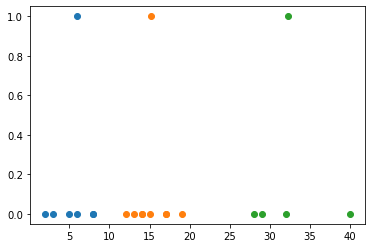

Whole cluster :  [[6, 5, 8, 6, 2, 3, 8], [15.125000000000036, 14, 14, 12, 17, 19, 17, 13, 15], [32.250000000064325, 29, 32, 40, 28]]


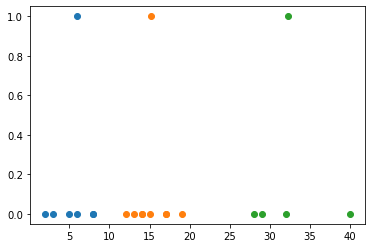

[[6, 5, 8, 6, 2, 3, 8], [15.125000000000004, 14, 14, 12, 17, 19, 17, 13, 15], [32.25000000001286, 29, 32, 40, 28]]


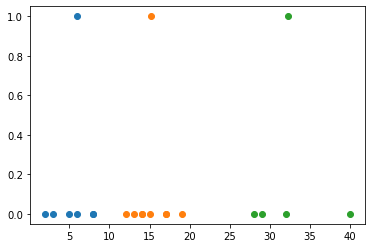

Whole cluster :  [[6, 5, 8, 6, 2, 3, 8], [15.125000000000004, 14, 14, 12, 17, 19, 17, 13, 15], [32.25000000001286, 29, 32, 40, 28]]


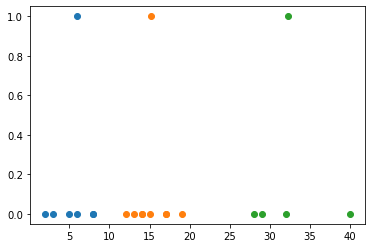

In [37]:
data = [5, 14, 29, 8, 6, 2, 14, 12, 32, 17, 40, 19, 3, 17, 13, 8, 15, 28]

k    = 3

cluster = random_centroid(k)
cluster = new_cluster(data, cluster)


for i in range(20):

    cluster = new_centroid(cluster)
    cluster = new_cluster(data, cluster)


## 3. NAIEV BAYES CLASSIFIER

In [38]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [39]:
iris = datasets.load_iris()

In [40]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [41]:
X=iris.data
y=iris.target

In [42]:
X.shape

(150, 4)

In [43]:
y.shape

(150,)

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

In [45]:
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB()

In [46]:
nv.fit(X_train,y_train)

GaussianNB()

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
y_pred = nv.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred)

1.0

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[13,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  8]], dtype=int64)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 4. DECISION TREE

In [52]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load data and store it into pandas DataFrame objects
iris = load_iris()
X = iris.data
y = iris.target

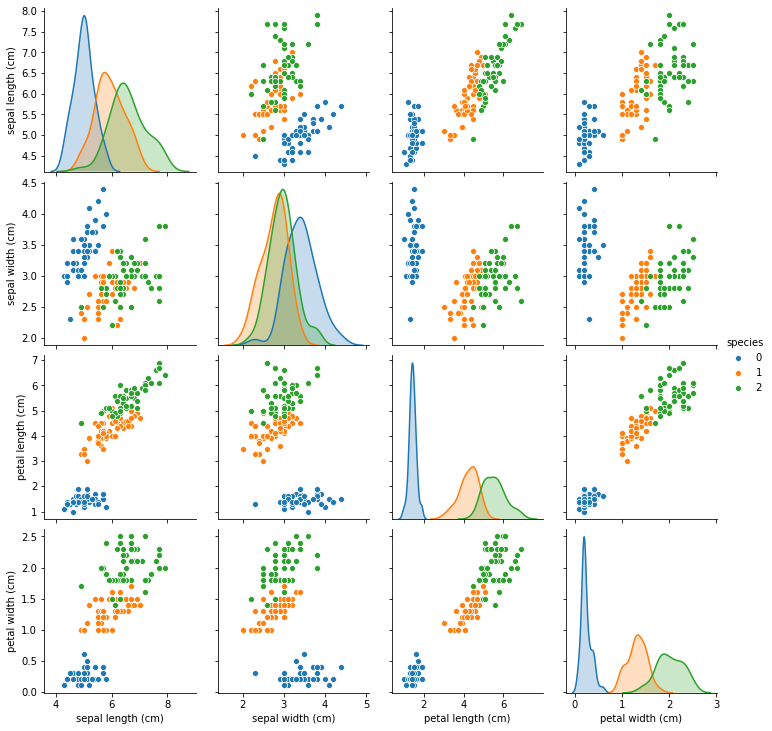

In [53]:
import seaborn as sns

data = pd.DataFrame(X, columns = iris.feature_names)
data["species"] = y

sns.pairplot(data, hue = "species")

In [54]:
# Defining and fitting a DecisionTreeClassifier instance
tree = DecisionTreeClassifier(max_depth = 2)
tree.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [55]:
from sklearn.tree import export_graphviz

export_graphviz(
             tree,
             out_file = "iris-graph.dot",
             feature_names = list(data.columns)[:-1],
             class_names = iris.target_names,
             filled = True,
             rounded = True)

In [56]:
!cat iris-graph.dot

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [57]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

#Defining and fitting a DecisionTreeClassifier instance
tree = DecisionTreeClassifier(max_depth = 2)
tree.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [58]:
tree.score(X,y)

0.31886477462437396

## 5. RANDOM FOREST

### Pandas library is used for data manipulation

In [59]:
import pandas as pd

### Read data

In [60]:
features = pd.read_csv('temps.csv')
features.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


### Identify Anomalies/ Missing Data

In [61]:
features.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


### Data Preparation

In [62]:
features = pd.get_dummies(features)

In [63]:
features.iloc[:,5:].head(5)

,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,46.0,44,46,46,46,41,0,0,0,0,0,1,0


### Features and Targets and Convert Data to Arrays

In [64]:
import numpy as np

In [65]:
labels = np.array(features['actual'])

In [66]:
features= features.drop('actual', axis = 1)


In [67]:
feature_list = list(features.columns)

In [68]:
features = np.array(features)

### Training and Testing Sets

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [71]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (261, 17)
Training Labels Shape: (261,)
Testing Features Shape: (87, 17)
Testing Labels Shape: (87,)


### Establish Baseline

In [72]:
baseline_preds = test_features[:, feature_list.index('average')]

In [73]:
baseline_errors = abs(baseline_preds - test_labels)

print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  5.06


### Train Model

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [76]:
rf.fit(train_features, train_labels);

### Make Predictions on the Test Set

In [77]:
predictions = rf.predict(test_features)

In [78]:
errors = abs(predictions - test_labels)

In [79]:
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 3.87 degrees.


### Determine Performance Metrics

In [80]:
mape = 100 * (errors / test_labels)

In [81]:
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.93 %.


### Variable Importances

In [82]:
importances = list(rf.feature_importances_)

In [83]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]


In [84]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [85]:
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.66
Variable: average              Importance: 0.15
Variable: forecast_noaa        Importance: 0.05
Variable: forecast_acc         Importance: 0.03
Variable: day                  Importance: 0.02
Variable: temp_2               Importance: 0.02
Variable: forecast_under       Importance: 0.02
Variable: friend               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


### For Random State

In [86]:
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

In [87]:
important_indices = [feature_list.index('temp_1'), 
                     feature_list.index('average')]

train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

In [88]:
rf_most_important.fit(train_important, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [89]:
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)

In [90]:
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape

print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.92 degrees.
Accuracy: 93.76 %.


### Visualizations

In [91]:
import matplotlib.pyplot as plt

In [92]:
%matplotlib inline

In [93]:
plt.style.use('fivethirtyeight')

In [94]:
x_values = list(range(len(importances)))

<BarContainer object of 17 artists>

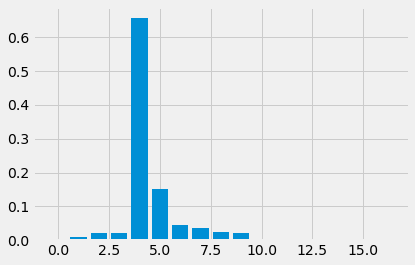

In [95]:
plt.bar(x_values, importances, orientation = 'vertical')


([<matplotlib.axis.XTick at 0x24159394640>,
 [Text(0, 0, 'year'),
  Text(0, 0, 'month'),
  Text(0, 0, 'day'),
  Text(0, 0, 'temp_2'),
  Text(0, 0, 'temp_1'),
  Text(0, 0, 'average'),
  Text(0, 0, 'forecast_noaa'),
  Text(0, 0, 'forecast_acc'),
  Text(0, 0, 'forecast_under'),
  Text(0, 0, 'friend'),
  Text(0, 0, 'week_Fri'),
  Text(0, 0, 'week_Mon'),
  Text(0, 0, 'week_Sat'),
  Text(0, 0, 'week_Sun'),
  Text(0, 0, 'week_Thurs'),
  Text(0, 0, 'week_Tues'),
  Text(0, 0, 'week_Wed')])

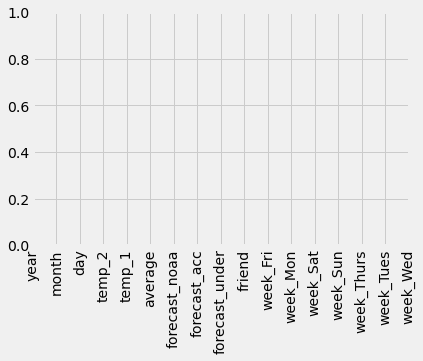

In [96]:
plt.xticks(x_values, feature_list, rotation='vertical')

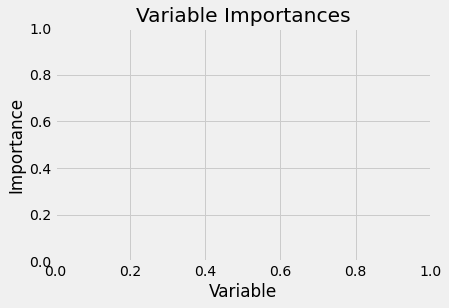

In [97]:
plt.ylabel('Importance'); plt.xlabel('Variable');
plt.title('Variable Importances');

### Use datetime for creating date objects for plotting

In [98]:
import datetime

In [99]:
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]

In [100]:
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

In [101]:
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

In [102]:
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]

In [103]:
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

In [104]:
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

In [105]:
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

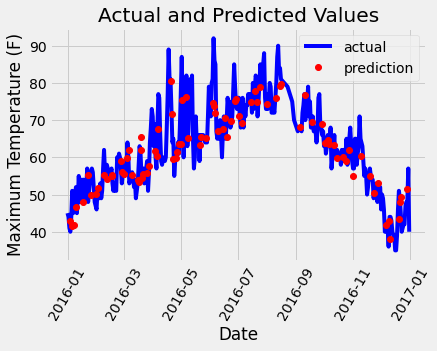

In [106]:
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

plt.plot(predictions_data['date'], 
         predictions_data['prediction'], 'ro', label = 'prediction')

plt.xticks(rotation = '60'); 
plt.legend()

plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); 
plt.title('Actual and Predicted Values');

In [107]:
# Make the data accessible for plotting

true_data['temp_1'] = features[:, feature_list.index('temp_1')]
true_data['average'] = features[:, feature_list.index('average')]
true_data['friend'] = features[:, feature_list.index('friend')]

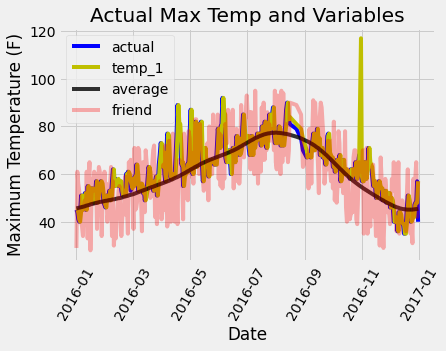

In [108]:
# Plot all the data as lines
plt.plot(true_data['date'], true_data['actual'], 'b-', label  = 'actual', alpha = 1.0)
plt.plot(true_data['date'], true_data['temp_1'], 'y-', label  = 'temp_1', alpha = 1.0)
plt.plot(true_data['date'], true_data['average'], 'k-', label = 'average', alpha = 0.8)
plt.plot(true_data['date'], true_data['friend'], 'r-', label = 'friend', alpha = 0.3)

# Formatting plot
plt.legend(); plt.xticks(rotation = '60');

# Lables and title
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)');
plt.title('Actual Max Temp and Variables');


## 6. LINEAR REGRESSION

In [109]:
from sklearn.datasets import load_boston
d = load_boston()

In [110]:
import pandas as pd
data = pd.DataFrame(d.data, columns=d.feature_names)

In [111]:
data['MEDV'] = d.target

In [112]:
d.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [113]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [114]:
X = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']]
y = data['MEDV']

In [115]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3, random_state=7)
y_test.head()

357    21.7
337    18.5
327    22.2
13     20.4
418     8.8
Name: MEDV, dtype: float64

### Importing Linear Regression

In [116]:
from sklearn.linear_model import LinearRegression

In [117]:
model = LinearRegression()

In [118]:
model.fit(X_train,y_train)

LinearRegression()

In [119]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [120]:
model.coef_

array([-1.05682313e-01,  2.78511721e-02,  1.97751387e-02,  2.74948915e+00,
       -1.55671652e+01,  5.31495793e+00, -1.07626811e-02, -1.31230457e+00,
        2.55970709e-01, -1.06786333e-02, -9.61979065e-01,  1.18877016e-02,
       -3.85699081e-01])

In [121]:
data.columns[:-1]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [122]:
actual = y_test.iloc[:10]
predicted = model.predict(X_test.iloc[:10])

In [123]:
for i,j in zip(actual, predicted):
    print(i, ":", j)

21.7 : 23.1314164837647
18.5 : 19.042360564246238
22.2 : 19.906675390816307
20.4 : 19.133630617046972
8.8 : 5.639871581139925
8.3 : 12.365128613929253
21.4 : 21.545825986292204
23.6 : 28.781141143463817
23.5 : 29.074895784091446
19.0 : 13.525632018904368


In [124]:
actual = y_test.iloc[:]
predicted = model.predict(X_test.iloc[:])

from math import sqrt

#python way

sum_of_squared_error = 0

for i,j in zip(actual, predicted):
    error=i-j
    squared_error = error**2
    sum_of_squared_error = sum_of_squared_error + squared_error

mean_squared_error = sum_of_squared_error/ len(actual)

root_mean_squared_error = sqrt(mean_squared_error)
print(root_mean_squared_error)

5.0762071954202606


### RMS value of error

In [125]:
import matplotlib.pyplot as plt

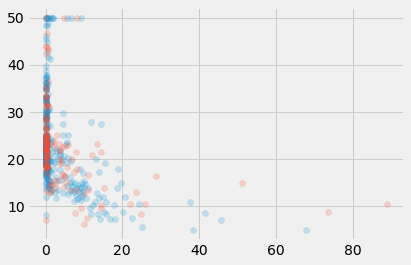

In [126]:
plt.scatter(X_train["CRIM"],y_train,alpha=.2)
plt.scatter(X_test["CRIM"],y_test,alpha=.2)


In [127]:
model.score(X_test,y_test)

0.6508417720329576

## 7. STATISTICAL FOR ONE VARIABLE

## Mean and standard deviation and varience
### mean: central tendency,average:sum of numbers/total numbers

In [128]:
import numpy as np
import matplotlib.pyplot as plt


In [129]:
a=np.array([80,85,82,90,89,89,80,85,86])
b=np.array([60,100,80,85,75,90,70,74,86,90,60])

In [130]:
a.mean(),b.mean()

(85.11111111111111, 79.0909090909091)

In [131]:
a.std(),b.std()

(3.603838831161523, 12.109009008732041)

In [132]:
marks=np.random.normal(80,20,1000000)

(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+00, 7.0000e+00,
        6.0000e+00, 8.0000e+00, 1.5000e+01, 1.5000e+01, 2.0000e+01,
        3.6000e+01, 4.9000e+01, 7.5000e+01, 1.1500e+02, 1.5100e+02,
        2.1700e+02, 2.6500e+02, 4.1100e+02, 4.7300e+02, 6.7200e+02,
        9.0500e+02, 1.1060e+03, 1.4320e+03, 1.8500e+03, 2.3170e+03,
        2.9620e+03, 3.6160e+03, 4.6160e+03, 5.5180e+03, 6.7030e+03,
        7.8690e+03, 9.3960e+03, 1.0944e+04, 1.2849e+04, 1.4685e+04,
        1.6895e+04, 1.8995e+04, 2.1365e+04, 2.3705e+04, 2.5927e+04,
        2.7945e+04, 3.0166e+04, 3.2186e+04, 3.4419e+04, 3.6092e+04,
        3.6798e+04, 3.7780e+04, 3.8818e+04, 3.8835e+04, 3.8744e+04,
        3.8127e+04, 3.7356e+04, 3.6459e+04, 3.4925e+04, 3.3227e+04,
        3.1388e+04, 2.9090e+04, 2.7213e+04, 2.4947e+04, 2.2398e+04,
        2.0245e+04, 1.7912e+04, 1.5774e+04, 1.3984e+04, 1.2071e+04,
        1.0303e+04, 8.9320e+03, 7.3180e+03, 6.0620e+03, 5.2040e+03,
        4.1020e+03, 3.3980e+03, 2.6190e+03, 2.11

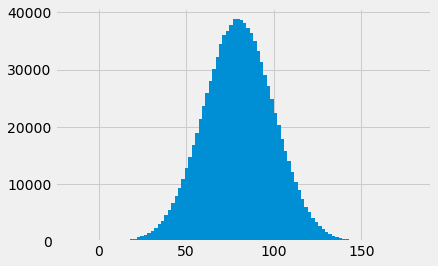

In [133]:
plt.hist(marks,bins=100)

In [134]:
marks[(marks<100) & (marks>60)].size

682979

In [135]:
marks[(marks<140) & (marks>20)].size/10000

99.722

## Linear Regression

In [143]:
import pandas as pd

In [144]:
data=pd.read_csv("headbrain.csv")

In [145]:
data=data.drop(["Gender","Age Range"],axis=1)
data.sample(5)

,Head Size(cm^3),Brain Weight(grams)
29,4175,1420
208,3318,1175
90,4160,1370
99,3478,1270
60,3866,1415


In [146]:
data.describe()

,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000
mean,3633.991561,1282.873418
std,365.261422,120.340446
min,2720.000000,955.000000
25%,3389.000000,1207.000000
50%,3614.000000,1280.000000
75%,3876.000000,1350.000000
max,4747.000000,1635.000000


In [147]:
data[["Head Size(cm^3)", "Brain Weight(grams)"]]

,Head Size(cm^3),Brain Weight(grams)
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590
...,...,...
232,3214,1110
233,3394,1215
234,3233,1104
235,3352,1170


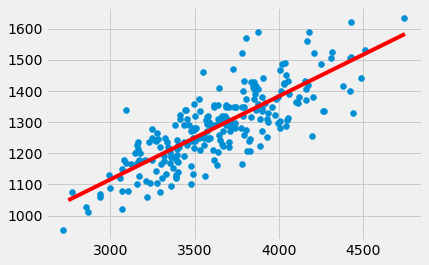

In [170]:
plt.scatter(data["Head Size(cm^3)"],data[("Brain Weight(grams)")])

plt.plot( [2750, 4750], [model.predict( [[2750]] ), model.predict( [[4750]] )], c="red")


### Seperate data into x and y

In [149]:
x,y= np.array(data["Head Size(cm^3)"]),np.array(data[("Brain Weight(grams)")])


In [150]:
x

array([4512, 3738, 4261, 3777, 4177, 3585, 3785, 3559, 3613, 3982, 3443,
       3993, 3640, 4208, 3832, 3876, 3497, 3466, 3095, 4424, 3878, 4046,
       3804, 3710, 4747, 4423, 4036, 4022, 3454, 4175, 3787, 3796, 4103,
       4161, 4158, 3814, 3527, 3748, 3334, 3492, 3962, 3505, 4315, 3804,
       3863, 4034, 4308, 3165, 3641, 3644, 3891, 3793, 4270, 4063, 4012,
       3458, 3890, 4166, 3935, 3669, 3866, 3393, 4442, 4253, 3727, 3329,
       3415, 3372, 4430, 4381, 4008, 3858, 4121, 4057, 3824, 3394, 3558,
       3362, 3930, 3835, 3830, 3856, 3249, 3577, 3933, 3850, 3309, 3406,
       3506, 3907, 4160, 3318, 3662, 3899, 3700, 3779, 3473, 3490, 3654,
       3478, 3495, 3834, 3876, 3661, 3618, 3648, 4032, 3399, 3916, 4430,
       3695, 3524, 3571, 3594, 3383, 3499, 3589, 3900, 4114, 3937, 3399,
       4200, 4488, 3614, 4051, 3782, 3391, 3124, 4053, 3582, 3666, 3532,
       4046, 3667, 2857, 3436, 3791, 3302, 3104, 3171, 3572, 3530, 3175,
       3438, 3903, 3899, 3401, 3267, 3451, 3090, 34

In [151]:
x=x.reshape(-1,1) 

### Designing and importing our model

In [152]:
from sklearn.linear_model import LinearRegression

In [153]:
model = LinearRegression()

## ML Flow

### Splitting our dataset

In [154]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3)

In [155]:
for i in x_train,x_test,y_train,y_test:
    print(i.shape)

(165, 1)
(72, 1)
(165,)
(72,)


In [156]:
model.fit(x_train, y_train)

LinearRegression()

In [157]:
total_error = 0
for i, j in zip(x_test, y_test):
    total_error = total_error +abs(j-model.predict(i.reshape(1,-1)))

average_error= total_error/y_test.shape[0]
average_error
               

array([56.50564629])

In [158]:
model.predict(x_train[10:20].reshape(-1,1))

array([1394.97269814, 1154.85029045, 1284.63898362, 1220.94391654,
       1195.35928708, 1248.66059845, 1392.30763257, 1287.30404918,
       1519.16475361, 1250.7926509 ])

In [159]:
model.coef_

array([0.26650656])

In [160]:
for i,j in zip(x_test, y_test):
    print(i, ":" ,j)

[3832] : 1208
[3878] : 1357
[3704] : 1220
[3067] : 1150
[3277] : 1105
[4175] : 1420
[3402] : 1220
[3899] : 1380
[3203] : 1180
[4022] : 1485
[3669] : 1222
[4008] : 1468
[3903] : 1334
[3937] : 1300
[3479] : 1103
[3218] : 1060
[3000] : 1090
[3323] : 1249
[3748] : 1350
[3443] : 1340
[3662] : 1230
[3835] : 1315
[4488] : 1440
[3571] : 1295
[3582] : 1300
[3935] : 1330
[3580] : 1320
[4114] : 1362
[3930] : 1252
[3532] : 1335
[3594] : 1290
[3495] : 1218
[3876] : 1588
[3830] : 1245
[4053] : 1312
[3436] : 1235
[3292] : 1075
[3318] : 1175
[4006] : 1302
[2857] : 1027
[3451] : 1340
[3707] : 1235
[3334] : 1236
[3497] : 1358
[3814] : 1207
[4046] : 1450
[3524] : 1250
[3566] : 1306
[3267] : 1243
[3647] : 1408
[3556] : 1250
[3394] : 1215
[3318] : 1192
[3548] : 1460
[3716] : 1300
[3058] : 1120
[3853] : 1373
[3248] : 1250
[3233] : 1104
[4012] : 1400
[3156] : 1170
[3124] : 1165
[3614] : 1180
[3787] : 1318
[3609] : 1210
[3309] : 1120
[4204] : 1380
[3493] : 1240
[3680] : 1321
[3090] : 1168
[3358] : 1190
[3890]

In [161]:
model.predict(x_test[0:5])

array([1337.94029498, 1350.19959659, 1303.82745571, 1134.06277902,
       1190.02915595])

In [162]:
model.predict(np.array([[1000]]))

array([583.19372608])

In [163]:
y_test[0:5]

array([1208, 1357, 1220, 1150, 1105], dtype=int64)

In [164]:
a=[95,69,23,45,6,8,9,34,5,69]
b=[34,23,56,56,47,5,7,8,9,90]

a_train, a_test, b_train, b_test= train_test_split(a,b)
a_train, a_test, b_train, b_test

([45, 8, 6, 69, 5, 9, 23],
 [95, 34, 69],
 [56, 5, 47, 90, 9, 7, 56],
 [34, 8, 23])

In [165]:
model.predict(np.array([[4500]]))

array([1515.96667493])

In [166]:
a=[95,69,23,45,6,8,9,34,5,69]
b=[34,23,56,56,47,5,7,8,9,90]

a_train, a_test, b_train, b_test= train_test_split(a,b)
a_train, a_test, b_train, b_test

([34, 69, 5, 9, 95, 8, 6],
 [23, 69, 45],
 [8, 23, 9, 7, 34, 5, 47],
 [56, 90, 56])

In [167]:
a = 2750-4500
b = model.predict([[2750]]) - model.predict([[4750]])

In [168]:
c = (model.predict([[2750]]) - model.predict([[4750]])/(2750-4750))
c

array([1050.37149716])

In [169]:
model.coef_

array([0.26650656])

## SVM

In [171]:
import numpy as np
from matplotlib import pyplot as plt

In [172]:
a = np.array([[0,3,-1],[2,2,-1],[2, 5, -1],[2, 4, -1],[4, 5, -1]])

In [173]:
b = np.array([-1,-1,1,1,1])


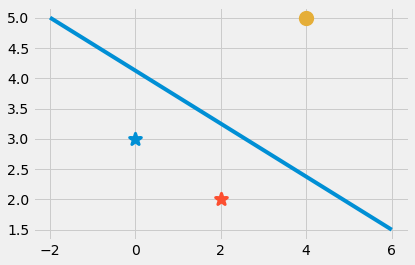

In [174]:
for i, sample in enumerate(a):
    if i < 2:
        plt.scatter(sample[0], sample[1], s=150, marker='*', linewidths=3)
else:
        plt.scatter(sample[0], sample[1], s=150, marker='o', linewidths=3)
plt.plot([-2,6],[5,1.5])

## PCA

In [175]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [176]:
from sklearn.datasets import load_breast_cancer 
  

In [177]:
cancer = load_breast_cancer() 
  

In [178]:
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names']) 
  

In [179]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [180]:
# Importing standardscalar module  
from sklearn.preprocessing import StandardScaler 

scalar = StandardScaler()   

In [181]:
# fitting 
scalar.fit(df) 
scaled_data = scalar.transform(df) 

In [182]:
# Importing PCA 
from sklearn.decomposition import PCA 
  

In [183]:
pca = PCA(n_components = 2) 
pca.fit(scaled_data) 
x_pca = pca.transform(scaled_data) 
  
x_pca.shape 

(569, 2)

Text(0, 0.5, 'Second Principal Component')

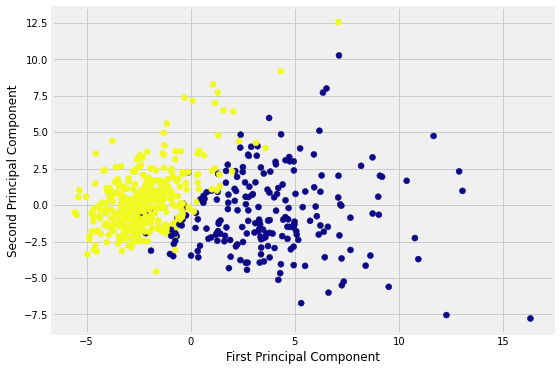

In [184]:
# giving a larger plot 
plt.figure(figsize =(8, 6)) 
  
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = cancer['target'], cmap ='plasma') 
 
# labeling x and y axis 
plt.xlabel('First Principal Component') 
plt.ylabel('Second Principal Component') 

In [185]:
pca.components_ 

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [186]:
df_comp = pd.DataFrame(pca.components_, columns = cancer['feature_names']) 
  
plt.figure(figsize =(14, 6)) 

<Figure size 1008x432 with 0 Axes>

<Figure size 1008x432 with 0 Axes>

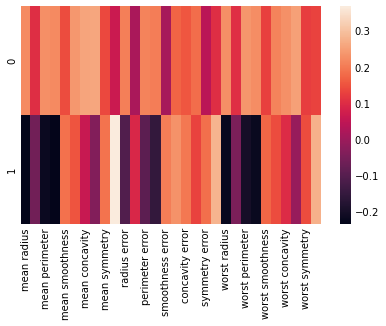

In [187]:
sns.heatmap(df_comp) 

##  8.GRADIENT DESCENT METHOD

In [188]:
import numpy as np
import matplotlib.pyplot as plt

In [189]:
class Linear_Regression:
    
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.b = [0, 0]
    
    def update_coeffs(self, learning_rate):
        Y_pred = self.predict()
        Y = self.Y
        m = len(Y)
        self.b[0] = self.b[0] - (learning_rate * ((1/m) * np.sum(Y_pred - Y)))
        self.b[1] = self.b[1] - (learning_rate * ((1/m) * np.sum((Y_pred - Y) * self.X)))
    
    def predict(self, X=[]):
        Y_pred = np.array([])
        if not X: X = self.X
        b = self.b
        for x in X:
            Y_pred = np.append(Y_pred, b[0] + (b[1] * x))
        return Y_pred
    
    def get_current_accuracy(self, Y_pred):
        p, e = Y_pred, self.Y
        n = len(Y_pred)
        return 1-sum(
            [
                abs(p[i]-e[i])/e[i]
                for i in range(n)
                if e[i] != 0]
        )/n
    
    def compute_cost(self, Y_pred):
        m = len(self.Y)
        J = (1 / 2*m) * (np.sum(Y_pred - self.Y)**2)
        return J
    
    def plot_best_fit(self, Y_pred, fig):
                f = plt.figure(fig)
                plt.scatter(self.X, self.Y, color='b')
                plt.plot(self.X, Y_pred, color='g')
                f.show()
    

In [190]:
def main():
    X = np.array([i for i in range(11)])
    Y = np.array([2*i for i in range(11)])
    regressor = Linear_Regression(X, Y)
    iterations = 0
    steps = 100
    learning_rate = 0.01
    costs = []
    
    #original best-fit line
    Y_pred = regressor.predict()
    regressor.plot_best_fit(Y_pred, 'Initial Best Fit Line')
    
    while 1:
        Y_pred = regressor.predict()
        
        cost = regressor.compute_cost(Y_pred)
        costs.append(cost)
        
        regressor.update_coeffs(learning_rate)
        iterations += 1
        
        if iterations % steps == 0:
            
            print(iterations, "epochs elapsed")
            print("Current accuracy is :",
                   
                  regressor.get_current_accuracy(Y_pred))
            stop = input("Do you want to stop (y/*)??")
            
            if stop == "y":
                break
        
        #final best-fit line
        regressor.plot_best_fit(Y_pred, 'Final Best Fit Line')
        
        #plot to verify cost fuction decreases
        h = plt.figure('Verification')
        plt.plot(range(iterations), costs, color='b')
        h.show()
        
        # if user wants to predict using the regressor:
        regressor.predict([i for i in range(10)])


In [ ]:
if __name__ == '__main__':
    main()

<ipython-input-189-0e1a55e293fd>:42: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
<ipython-input-189-0e1a55e293fd>:42: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
<ipython-input-190-73662138b6c1>:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  h.show()
<ipython-input-189-0e1a55e293fd>:42: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
<ipython-input-190-73662138b6c1>:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  h.show()
<ipython-input-189-0e1a55e293fd>:42: UserWarning: Matplotlib is c

100 epochs elapsed
Current accuracy is : 0.9836456109008862
